# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Primeiro caso de teste

In [6]:
#função fitness
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


In [3]:
#população inicial (primeira geração)
n_pop = 100
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[0.84058694, 0.94867314, 0.58716422],
       [0.05704999, 0.43384923, 0.19747012],
       [0.48559196, 0.23054248, 0.52409017],
       [0.78765489, 0.27448539, 0.50176689],
       [0.06158624, 0.9397283 , 0.48749188],
       [0.80334505, 0.95266359, 0.81289237],
       [0.25209828, 0.48605963, 0.41431812],
       [0.06658765, 0.27457826, 0.86371892],
       [0.08477235, 0.57621418, 0.83368055],
       [0.52798978, 0.29555489, 0.03277894],
       [0.91431001, 0.80953423, 0.41933705],
       [0.19973505, 0.23759523, 0.49273721],
       [0.77424489, 0.92192756, 0.40939987],
       [0.6405399 , 0.81143238, 0.21639102],
       [0.63973291, 0.24289099, 0.58655674],
       [0.29146952, 0.92647834, 0.48503672],
       [0.91495193, 0.1970598 , 0.2580448 ],
       [0.90313554, 0.1484636 , 0.87793383],
       [0.94409765, 0.3528786 , 0.88264708],
       [0.78647859, 0.0308249 , 0.953264  ],
       [0.29124294, 0.1519778 , 0.94722502],
       [0.56497516, 0.77232691, 0.12580652],
       [0.

In [4]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[ 2.04352161,  3.69203882,  3.52298531],
       [-2.65770006,  0.60309541,  1.18482069],
       [-0.08644826, -0.6167451 ,  3.14454101],
       [ 1.72592931, -0.35308768,  3.01060136],
       [-2.63048253,  3.6383698 ,  2.92495127],
       [ 1.82007032,  3.71598154,  4.87735421],
       [-1.48741031,  0.9163578 ,  2.48590871],
       [-2.60047411, -0.35253046,  5.1823135 ],
       [-2.4913659 ,  1.45728509,  5.0020833 ],
       [ 0.16793867, -0.22667066,  0.19667364],
       [ 2.48586005,  2.85720537,  2.51602232],
       [-1.80158968, -0.57442861,  2.95642325],
       [ 1.64546937,  3.53156537,  2.4563992 ],
       [ 0.8432394 ,  2.86859431,  1.2983461 ],
       [ 0.83839745, -0.54265408,  3.51934046],
       [-1.25118286,  3.55887004,  2.9102203 ],
       [ 2.48971158, -0.81764123,  1.54826882],
       [ 2.41881324, -1.1092184 ,  5.267603  ],
       [ 2.66458592,  0.11727161,  5.29588247],
       [ 1.71887156, -1.81505061,  5.719584  ],
       [-1.25254233, -1.0881332 ,  5.683

In [5]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[ 2.04352161e+00,  3.69203882e+00,  3.52298531e+00,
         7.63546901e+01],
       [-2.65770006e+00,  6.03095407e-01,  1.18482069e+00,
         2.71660824e+02],
       [-8.64482614e-02, -6.16745102e-01,  3.14454101e+00,
         1.49377560e+02],
       [ 1.72592931e+00, -3.53087676e-01,  3.01060136e+00,
         1.16013538e+02],
       [-2.63048253e+00,  3.63836980e+00,  2.92495127e+00,
         1.85658116e+02],
       [ 1.82007032e+00,  3.71598154e+00,  4.87735421e+00,
         1.71350771e+02],
       [-1.48741031e+00,  9.16357801e-01,  2.48590871e+00,
         9.32864046e+01],
       [-2.60047411e+00, -3.52530458e-01,  5.18231350e+00,
         3.83196895e+02],
       [-2.49136590e+00,  1.45728509e+00,  5.00208330e+00,
         2.48037274e+02],
       [ 1.67938671e-01, -2.26670657e-01,  1.96673644e-01,
         3.41843665e+02],
       [ 2.48586005e+00,  2.85720537e+00,  2.51602232e+00,
         4.38008538e+01],
       [-1.80158968e+00, -5.74428610e-01,  2.95642325e+00,
      

In [6]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[ 5.67849215e-01,  1.88695217e+00,  3.14658449e+00,
         2.76774967e+00],
       [ 2.15007227e+00,  1.98921324e+00,  3.03037441e+00,
         1.32566675e+01],
       [ 3.23175912e-02,  1.06912561e+00,  3.40192973e+00,
         3.15410604e+01],
       [-1.22293760e-01,  9.58146999e-01,  2.70911777e+00,
         3.68429604e+01],
       [-2.53599431e-01,  1.92813405e+00,  2.04010450e+00,
         4.34603910e+01],
       [ 2.48586005e+00,  2.85720537e+00,  2.51602232e+00,
         4.38008538e+01],
       [ 1.67906068e+00,  3.23715798e+00,  3.62836418e+00,
         4.70676776e+01],
       [-4.99485846e-01,  1.95256666e+00,  1.96364394e+00,
         5.47505931e+01],
       [ 1.64546937e+00,  3.53156537e+00,  2.45639920e+00,
         5.99452119e+01],
       [ 1.45827527e+00,  1.82762487e+00,  4.38556495e+00,
         6.02881331e+01],
       [ 1.73136540e+00,  3.50395614e+00,  3.58660953e+00,
         6.09099573e+01],
       [-1.40373060e+00,  2.35118459e+00,  3.27028636e+00,
      

In [7]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[ 5.67849215e-01,  1.88695217e+00,  3.14658449e+00,
         2.76774967e+00],
       [ 2.15007227e+00,  1.98921324e+00,  3.03037441e+00,
         1.32566675e+01],
       [ 3.23175912e-02,  1.06912561e+00,  3.40192973e+00,
         3.15410604e+01],
       [-1.22293760e-01,  9.58146999e-01,  2.70911777e+00,
         3.68429604e+01],
       [-2.53599431e-01,  1.92813405e+00,  2.04010450e+00,
         4.34603910e+01],
       [ 2.48586005e+00,  2.85720537e+00,  2.51602232e+00,
         4.38008538e+01],
       [ 1.67906068e+00,  3.23715798e+00,  3.62836418e+00,
         4.70676776e+01],
       [-4.99485846e-01,  1.95256666e+00,  1.96364394e+00,
         5.47505931e+01],
       [ 1.64546937e+00,  3.53156537e+00,  2.45639920e+00,
         5.99452119e+01],
       [ 1.45827527e+00,  1.82762487e+00,  4.38556495e+00,
         6.02881331e+01],
       [ 1.73136540e+00,  3.50395614e+00,  3.58660953e+00,
         6.09099573e+01],
       [-1.40373060e+00,  2.35118459e+00,  3.27028636e+00,
      

In [8]:
#contagem de população estagnada
cont = 0
delta = 0.01

In [11]:
sem_evoluir = 100
i_desejadas = 5
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)
    #print('Número de iterações para a convergência: ',i+1)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioSup = media + desvioP
desvioInf = media - desvioP
tabela

,0,0,0,0,0
0,2.767750,2.767750,2.767750,2.767750,2.767750
1,0.749677,2.767750,2.767750,2.767750,2.767750
2,0.749677,2.767750,2.767750,2.767750,2.767750
3,0.749677,2.767750,2.663016,2.767750,2.767750
4,0.749677,2.767750,1.238837,2.767750,2.767750
...,...,...,...,...,...
95,0.749677,0.925637,0.516177,0.605057,0.939933
96,0.749677,0.925637,0.516177,0.605057,0.939933
97,0.749677,0.925637,0.516177,0.605057,0.939933
98,0.749677,0.925637,0.516177,0.605057,0.939933


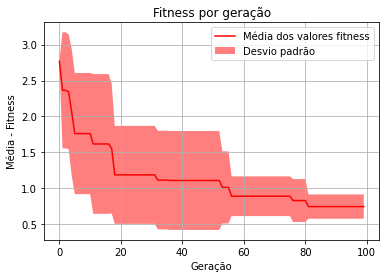


Número de iterações para a última convergência:  100


In [12]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("Média - Fitness")
plt.plot(media, color = "red", label = "Média dos valores fitness")
plt.fill_between(range(len(media)), desvioSup, desvioInf, facecolor='red', alpha=0.5, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)

## Segundo caso de teste

In [13]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [14]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [15]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [16]:
#palavra aleatoria (ja convertida para os limites da palavra alvo)
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([105.32502121,  66.54900078,  69.85834628,  70.75142308,
         82.64950522,  57.76481294, 112.3218038 ,  60.12164724,
         54.62751511,  65.69227349, 121.23359222,  58.73204846,
         95.18051266,  79.63359499,  56.46079469, 121.20761651,
         90.94883676,  74.56628095, 111.58787049, 109.23211713,
         85.85668114,  54.68088375,  74.61311546,  89.5717028 ,
         87.77582332, 118.31480071,  89.13752736,  79.15654031,
        125.86616936,  80.74588675])]

In [17]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[1.05325021e+02, 2.78551952e+03],
       [6.65490008e+01, 1.96056026e+02],
       [6.98583463e+01, 2.99682710e+02],
       [7.07514231e+01, 3.31401020e+02],
       [8.26495052e+01, 9.06160821e+02],
       [5.77648129e+01, 2.72255718e+01],
       [1.12321804e+02, 3.57302717e+03],
       [6.01216472e+01, 5.73752808e+01],
       [5.46275151e+01, 4.32854311e+00],
       [6.56922735e+01, 1.72798215e+02],
       [1.21233592e+02, 4.71784795e+03],
       [5.87320485e+01, 3.82548245e+01],
       [9.51805127e+01, 1.81761640e+03],
       [7.96335950e+01, 7.33683628e+02],
       [5.64607947e+01, 1.53177889e+01],
       [1.21207617e+02, 4.71428026e+03],
       [9.09488368e+01, 1.47470107e+03],
       [7.45662809e+01, 4.84848734e+02],
       [1.11587870e+02, 3.48582439e+03],
       [1.09232117e+02, 3.21320250e+03],
       [8.58566811e+01, 1.10953486e+03],
       [5.46808837e+01, 4.55345984e+00],
       [7.46131155e+01, 4.86913452e+02],
       [8.95717028e+01, 1.37082862e+03],
       [8.777582

In [18]:
#ordenar
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra_inicial

array([[ 54.62751511,   4.32854311],
       [ 54.68088375,   4.55345984],
       [ 56.46079469,  15.31778887],
       [ 57.76481294,  27.22557184],
       [ 58.73204846,  38.25482445],
       [ 60.12164724,  57.37528081],
       [ 65.69227349, 172.7982151 ],
       [ 66.54900078, 196.05602587],
       [ 69.85834628, 299.68270987],
       [ 70.75142308, 331.40101952],
       [ 74.56628095, 484.84873351],
       [ 74.61311546, 486.9134517 ],
       [ 79.15654031, 708.06763571],
       [ 79.63359499, 733.68362839],
       [ 80.74588675, 795.17721406]])

In [19]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [20]:
#funcao random walk
#parametros: melhor_pop_inicial, n_pop, dim, converter, funcao fitness, tabela
#problema: funcao fitness

In [21]:
tabela2 = pd.DataFrame()
for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_palavra_inicial.copy() #troca melhor_pop_inicial

            #novos 50% da população
            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            #converter para as faixas
            nova_pop = converter2(nova_pop) #troca converter1

            #fitness da nova população
            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()] 

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_2/2),:]

            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            nova_pop = converter2(nova_pop) #troca converter1

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao == delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP2 = np.std(tabela2,axis=1)
media2 = np.mean(tabela2,axis=1)
desvioInf2 = media2 - desvioP2
desvioSup2 = media2 + desvioP2

tabela2

,0,0,0,0,0
0,0.030803,4.328543,3.312823,0.894581,0.052171
1,0.030803,4.328543,3.312823,0.894581,0.052171
2,0.030803,4.328543,3.312823,0.671591,0.052171
3,0.030803,0.010332,0.685790,0.671591,0.052171
4,0.030803,0.010332,0.685790,0.019422,0.052171
...,...,...,...,...,...
95,0.000031,0.003077,0.000014,0.000184,0.000700
96,0.000031,0.003077,0.000014,0.000184,0.000700
97,0.000031,0.003077,0.000014,0.000184,0.000700
98,0.000031,0.003077,0.000014,0.000184,0.000700


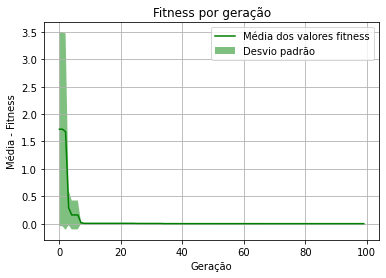


Número de iterações para a última convergência:  100


In [22]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("Média - Fitness")
plt.plot(media2, color = "green", label = "Média dos valores fitness")
plt.fill_between(range(len(media2)), desvioSup2, desvioInf2, facecolor='green', alpha=0.5, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)<br>

## Terceiro caso de teste

In [7]:
#função rastrigin
def rastrigin(x):
    return 10 * len(x) + sum(i * i - 10 * math.cos(2 * math.pi * i) for i in x)

def converter3(pop):
    lb = -5.12
    ub = 5.12
    novaPop =[]
    for i in pop:
        novaPop=np.append(novaPop,lb + (ub - lb) * i)
    return novaPop

In [8]:
#gerar pop nas faixas
tamanho_3 = 10
dim_3 = 1
pop_r = converter3(criaPop(10,1))
pop_r

array([-1.13378717,  2.94856379,  0.94790068, -4.18061993,  0.98523855,
       -4.99831481, -2.24359741, -4.14423337,  2.13954328, -3.63001761])

In [9]:
#fitness
rastrigin(pop_r)

138.35128690006977